In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r'./data/datos_df3.csv')

df.head()

,IDX,mean_ndvi_2022-06-02,mean_ndvi_2022-06-17,mean_ndvi_2022-06-07,mean_ndvi_2022-06-27,mean_ndvi_2022-06-22,mean_ndvi_2022-06-12,mean_ndre_2022-06-02,mean_ndre_2022-06-17,mean_ndre_2022-06-07,...,sum_ndvi_2022-06-07,sum_ndvi_2022-06-27,sum_ndvi_2022-06-22,sum_ndvi_2022-06-12,sum_ndre_2022-06-02,sum_ndre_2022-06-17,sum_ndre_2022-06-07,sum_ndre_2022-06-27,sum_ndre_2022-06-22,sum_ndre_2022-06-12
0,3942,0.007476,0.212770,0.180844,-0.007705,0.038478,0.219896,-0.017073,0.151714,0.123746,...,12.839933,-0.547055,2.731913,15.612608,-1.212181,10.771678,8.785966,-1.924856,-0.259414,10.886635
1,4053,0.008709,0.202058,0.165046,-0.005460,-0.019584,0.198812,-0.007738,0.134886,0.106043,...,32.018860,-1.059211,-3.799293,38.569600,-1.501124,26.167940,20.572346,-4.967695,-7.591245,24.986805
2,4196,0.204576,0.192939,0.156745,0.001065,-0.011448,0.186642,0.226347,0.128658,0.095656,...,15.047543,0.102206,-1.099016,17.917662,21.729303,12.351145,9.183014,-2.268778,-4.328455,11.240659
3,4422,-0.001838,0.198717,0.181343,-0.009038,-0.002894,0.215428,-0.036878,0.132829,0.113879,...,10.336535,-0.515191,-0.164956,12.279409,-2.102046,7.571269,6.491099,-1.605132,-1.682397,7.757051
4,4424,-0.046762,0.205482,0.185708,-0.010250,-0.005377,0.218237,-0.094255,0.145178,0.124556,...,6.871180,-0.379265,-0.198932,8.074769,-3.487440,5.371600,4.608560,-1.066419,-1.157790,5.483689


Presentamos el dataset que hace referencia a la vista minable del modelo de produción de cultivo que vamos a buscar.
En este encontramos varios estadísticos por cada índice vegetativo en varias fechas. El campo IDX de cada fila hace referencia a la parcela que se está estudiando.
El dataset anterior contiene solo una muestra de 25 parcelas las cuales van a servir como primer ejemplo de busqueda de modelos.
Este cuaderno y los siguientes tienen que servir como producto reutilizable para el posterior tratado de datos de cualquier parcelario.

In [8]:
df.shape

(25, 26)

In [9]:
# librerías para visualizar:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

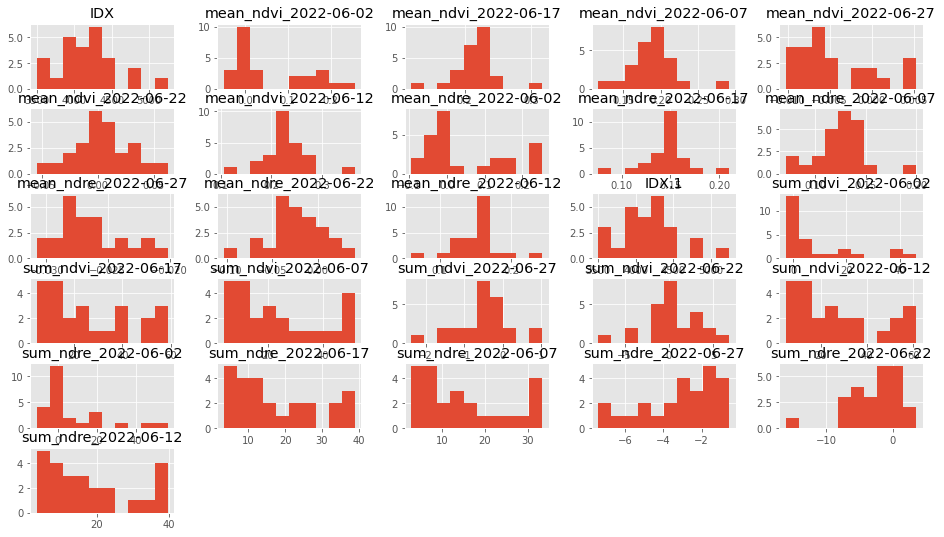

In [10]:
# Histograms

df.hist()

plt.show()

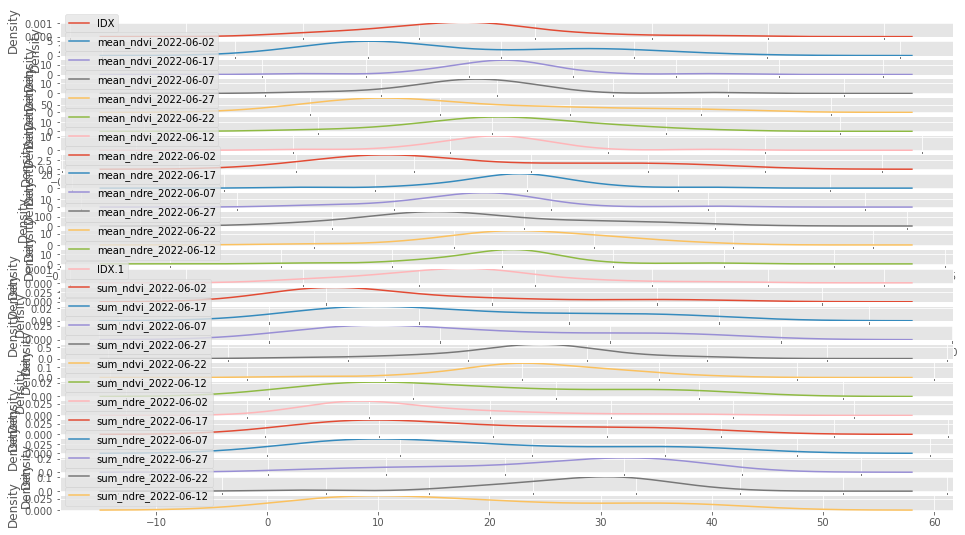

In [11]:
# Density
# visualizamos la densidad de los índices:

df.plot(kind='density', subplots=True, sharex=False)
plt.show()

Preprocesamiento:

Los datos que han llegado a este punto necesitan aún de un calibrado que no se ha ejecutado sobre ellos. Las fechas de los índice sobre los que estamos trabajando son representativas de la evolución de las parcelas. Pero hay que tener en cuenta que estos índices si salen con un valor negativo entonces es provable que provengan del procesado de una imágen satelital con nubes que corrompe el valor. El pequeño paso de preprocesamiento que vamos a llevar a cabo consite en eliminar aquellos índices que no tengan sentido.

Para ello hacemo un drop de las columnas con una media negativa y aseguramos que los índices en esa fecha no proviene del procesamiento de una imagen con nubes.

In [12]:
# drop columns with negative mean.

for col in df.columns:

    df2 = df[col].mean()

    if (df2 < 0):

        df = df.drop(columns=[col], axis =1)

In [13]:
# visualizamos las columnas eliminadas

df.shape

(25, 20)

In [14]:
# guardamos el cuaderno para el uso con los modelos.

df.to_csv('preprocess.csv', index=False)

In [16]:
X = df
y = pd.read_csv('./data/target_PROD.csv')['PROD']

In [17]:
# selección de variables:

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(df.shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

ValueError: cannot reshape array of size 20 into shape (25,20)